In [2]:
#import my local file, a CSV file of songs from spotify with different audio descriptions and features. 
import pandas as pd
file = 'song_data.csv'
df = pd.read_csv (file)

In [3]:
#install xgboost which will be used later
!pip install xgboost

In [4]:
#install plotly for any visualizations down the road
!pip install plotly


In [5]:
#install profiling to get a good look at the features and any problems that might arise
!pip install pandas-profiling

In [6]:
#import plotly for any visualizations and possible heroku app
import plotly.express as px

In [7]:
#look at the data
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [8]:
#take a look at the shape of the data, there are thousands of observations which will be helpful
df.shape

(18835, 15)

In [9]:
#create a pandas profiling report to identify any issues with the data
from pandas_profiling import ProfileReport
profile = ProfileReport(df, minimal=True).to_notebook_iframe()

profile

In [10]:
#look at the distribution and range of the data
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [11]:
#dropping any duplicate entries in the dataframe
df.drop_duplicates(keep=False,inplace=True) 

In [12]:
#look at the shape after dropping duplicates
df.shape

(12721, 15)

In [13]:
#look specifically at how many values there are for song popularity
df['song_popularity'].nunique()

93

In [14]:
#look at the range for song popularity 
df['song_popularity'].describe()

count    12721.000000
mean        46.211304
std         19.496024
min          0.000000
25%         35.000000
50%         49.000000
75%         60.000000
max         93.000000
Name: song_popularity, dtype: float64

In [15]:
#drop any row in song popularity that is a 0 since that is equivalent to a null value
index_delete = df.index[df['song_popularity']==0]
df = df.drop(index_delete)

In [16]:
#look at the shape again after these modifications 
df.shape

(12498, 15)

In [17]:
#look at what data types we are looking at 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12498 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         12498 non-null  object 
 1   song_popularity   12498 non-null  int64  
 2   song_duration_ms  12498 non-null  int64  
 3   acousticness      12498 non-null  float64
 4   danceability      12498 non-null  float64
 5   energy            12498 non-null  float64
 6   instrumentalness  12498 non-null  float64
 7   key               12498 non-null  int64  
 8   liveness          12498 non-null  float64
 9   loudness          12498 non-null  float64
 10  audio_mode        12498 non-null  int64  
 11  speechiness       12498 non-null  float64
 12  tempo             12498 non-null  float64
 13  time_signature    12498 non-null  int64  
 14  audio_valence     12498 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 1.5+ MB


In [18]:
df.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

/Users/devrihartle/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


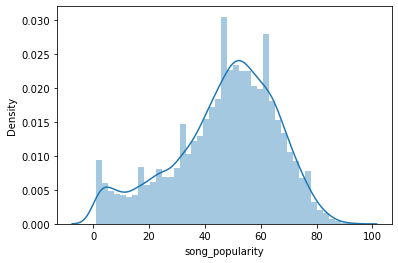

In [19]:
#create a distribution plot to show the distribution of our target 
import seaborn as sns 
import matplotlib.pyplot as plt
sns.distplot(df['song_popularity']);

this will be a classification problem, determining if a song is popular or not popular after changing the target to a binary classification feature.

In [20]:
#create a new column with a binary classification for song popularity, a song will be considered 'popular' if it has a
#rating of 60 or above. 
df['popular'] = [True if i>=60 else False for i in df.song_popularity ]
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popular
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,True
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,True
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,True
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,True
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,False


Value Counts for popular=1, and not popular=0


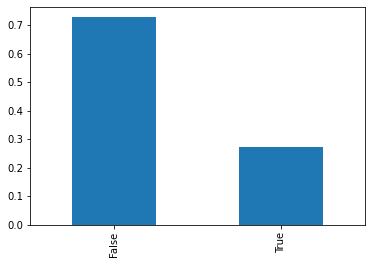

In [21]:
#we can see in this new column that about 72% of the songs in the current dataframe are 
#considered 'not popular'
df['popular'].value_counts(normalize=True).plot(kind='bar')
print('Value Counts for popular=1, and not popular=0')

In [22]:
#look at the tempo column
df['tempo'].describe()

count    12498.000000
mean       121.102362
std         29.241674
min          0.000000
25%         98.029000
50%        120.016000
75%        139.952000
max        242.318000
Name: tempo, dtype: float64

there shouldn't be any songs with a tempo of 0, so we will treat that as a null value

In [23]:
#I will replace the 0's in the tempo column with nan
import numpy as np
df['tempo'].replace(0, np.nan, inplace=True)
df['tempo'].describe()

count    12497.000000
mean       121.112053
std         29.222768
min         46.591000
25%         98.029000
50%        120.016000
75%        139.952000
max        242.318000
Name: tempo, dtype: float64

In [24]:
#now that the data is more organized and cleaned, I will create
#a train, validation, and test set of the data
from sklearn.model_selection import train_test_split
train, validate, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])
test.shape

(2500, 16)

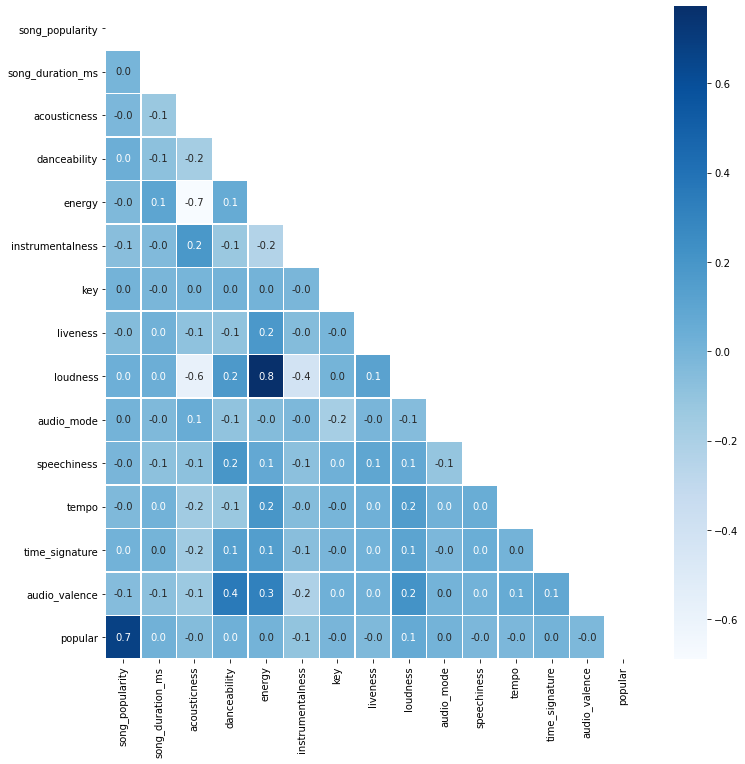

In [25]:
#lets look at the correlation between these features
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)
plt.show() 

In [26]:
#right off the bat I can see that there are no items that have a strong correlation with a song being popular

I will use accuracy since my majority class is <50 and >70

In [27]:
#create the feature matrices and different training and test sets 
target = 'popular'
features = df.columns.drop([target, 'song_popularity'])

X_train = train[features]
y_train = train[target]
X_val = validate[features]
y_val = validate[target]
X_test = test[features]
y_test = test[target]



In [28]:
#find my baseline accuracy 
print('Baseline Accuracy:', y_train.value_counts(normalize=True).max())

Baseline Accuracy: 0.7264603894371833


In [29]:
!pip install category_encoders==2.*

In [30]:
#I will try two different models, a logistic regression, randomforest classifier, and a Xg Boost model

In [31]:
#create a logistic regression model for prediction
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

model_lr = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='median'), 
    StandardScaler(), 
    LogisticRegression()
)

model_lr

Pipeline(steps=[('onehotencoder', OneHotEncoder(use_cat_names=True)),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [32]:
#first lets try making a random forest classifier to see how it will perform 
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
model_rf = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

model_rf.fit(X_train, y_train)
print('Val accuracy', model_rf.score(X_val, y_val))


Val accuracy 0.7292


In [33]:
# we can see that this random forest model is not quite predicting better than the baseline 
#try XG boost
from xgboost import XGBClassifier
pipeline_xg = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'),
    XGBClassifier(random_state=42)
)

pipeline_xg.fit(X_train, y_train)

/Users/devrihartle/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:22:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['song_name'],
                                mapping=[{'col': 'song_name',
                                          'data_type': dtype('O'),
                                          'mapping': Sham Pain                              1
To the Max                             2
Save MY Soul - Sunrise Edit            3
Nightmares By The Sea                  4
Kalaghha                               5
                                    ... 
La pachanga                         7010
We Are Your Friends - Radio Edit    7011
Best Hugs                           7012
Fool                                7013
NaN                                   -2
Length: 7014, dtype: int64}])),
                ('simpleimputer', SimpleImputer(strategy='median')),
                (...
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               i

In [34]:
#we can see that the model does not predict the probability of a song being popular better than the baseline, this 
#seems to be a poor performing model
pipeline_xg.score(X_val, y_val)

0.726

Lets do some Cross Fold Validation to see which model looks the best at predicting. 

In [35]:
#cross validation 
from sklearn.model_selection import cross_val_score
scores_lr = cross_val_score(model_lr, X_train, y_train, cv=5)

/Users/devrihartle/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/devrihartle/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/devrihartle/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  el

In [36]:
#looking at the average scores after using K fold validation 
scores_lr
print('Mean CV accuracy score LR', scores_lr.mean())

Mean CV accuracy score LR 0.7179253724705361


In [37]:
from sklearn.model_selection import cross_val_score
scores_rf = cross_val_score(model_rf, X_train, y_train, cv=5)

/Users/devrihartle/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/devrihartle/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/devrihartle/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/devrihartle/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categor

In [38]:
print('Mean CV accuracy score RF', scores_rf.mean())

Mean CV accuracy score RF 0.7072592394929954


In [39]:
scores_xg = cross_val_score(pipeline_xg, X_train, y_train, cv=5)

[07:24:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/devrihartle/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/devrihartle/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/devrihartle/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/devrihartle/opt/

[07:24:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/devrihartle/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/devrihartle/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:24:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/devrihartle/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/devrihartle/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:24:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/devrihartle/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/devrihartle/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:24:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [40]:
print('Mean CV accuracy score XG', scores_xg.mean())

Mean CV accuracy score XG 0.6797888370024461


We can see that the Random forest model is doing slightly better than the logistic regression model, but still is not performing better than the baseline

The model that performs the best is the Random Forest model. Let's specifically tune that model

In [41]:
#look at the specifc steps in the random forest model 
model_rf.named_steps.keys()

dict_keys(['ordinalencoder', 'simpleimputer', 'randomforestclassifier'])

In [42]:
#create a randomized search cv
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {
    'randomforestclassifier__max_depth': range(5,35,5),
    'randomforestclassifier__n_estimators': [25, 50, 75],
    'randomforestclassifier__max_samples': np.arange(0.2,0.8,.2)
}

model_g = GridSearchCV(model_rf, 
                           param_grid=params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=1)

In [43]:
#fit the model on the training set
model_g.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  2.8min finished
/Users/devrihartle/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('ordinalencoder',
                                        OrdinalEncoder(cols=['song_name'],
                                                       mapping=[{'col': 'song_name',
                                                                 'data_type': dtype('O'),
                                                                 'mapping': Sham Pain                              1
To the Max                             2
Save MY Soul - Sunrise Edit            3
Nightmares By The Sea                  4
Kalaghha                               5
                                    ... 
La pachanga                         7010
We Are Your Friends - Radio Edit    7011
Best Hugs                           7012
Fool                                7013
NaN                                   -2
Length: 7014, dtype: int64}])),
                                       ('simpleimputer',
                                        SimpleImputer(st

In [44]:
#look at the best paramteres for our random forest classifier after grid search 
model_g.best_params_

{'randomforestclassifier__max_depth': 5,
 'randomforestclassifier__max_samples': 0.4,
 'randomforestclassifier__n_estimators': 25}

In [45]:
#look at the best score for a our grid search
model_g.best_score_

0.7273936804628394

In [46]:
model_g.predict(X_train)

array([False, False, False, ..., False, False, False])

In [47]:
#create a randomized search CV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

params = {
    'randomforestclassifier__max_depth': range(5,35,5),
    'randomforestclassifier__n_estimators': [25, 50, 75],
    'randomforestclassifier__max_samples': np.arange(0.2,0.8,.2)
}
    
model_RCV = RandomizedSearchCV(
    model_rf, 
    param_distributions = params, 
    n_iter=12, 
    n_jobs=-1, 
    cv=10, 
    random_state=42, 
    verbose=1
)

In [48]:
#fit on the training set
model_RCV.fit(X_train, y_train);

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   25.2s finished
/Users/devrihartle/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [49]:
#look at the best parameters for a randomized search cV
model_RCV.best_params_

{'randomforestclassifier__n_estimators': 50,
 'randomforestclassifier__max_samples': 0.4,
 'randomforestclassifier__max_depth': 5}

In [50]:
#look at our best score for the RCV
model_RCV.best_score_

0.7268603471295061

In [51]:
#score on validation set 
model_RCV.score(X_val, y_val)

0.7332

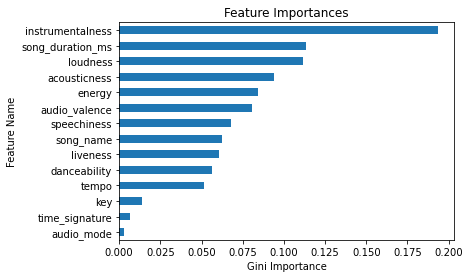

In [52]:
#lets visualize the importance of each feature in creating purity for the model
importances = model_RCV.best_estimator_.named_steps['randomforestclassifier'].feature_importances_
features = X_train.columns
pd.Series(importances, index=features).sort_values().tail(15).plot(kind='barh')
plt.xlabel('Gini Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importances')
plt.show()

We can see that instrumentalness is really important to our model, and audio mode doesn't seem to do much at all for our model, as well as time signature. Let's see if we can improve our model. 

In [53]:
#lets look at permutation importances
from sklearn.inspection import permutation_importance
perm_impo = permutation_importance(model_RCV,
                                  X_val,
                                  y_val,
                                  n_jobs=11, 
                                  random_state=42)


In [54]:
#create a dataframe to show permutation importances 
data = {'importances_mean': perm_impo['importances_mean'],
       'importances_std': perm_impo['importances_std']}
df_impo = pd.DataFrame(data, index=X_val.columns)
df_impo.sort_values(by='importances_mean', inplace=True)

In [55]:
df_impo

,importances_mean,importances_std
tempo,-0.00024,0.000196
key,0.00000,0.000000
audio_mode,0.00000,0.000000
time_signature,0.00000,0.000000
danceability,0.00008,0.000299
song_name,0.00008,0.000160
liveness,0.00040,0.000438
speechiness,0.00048,0.000392
audio_valence,0.00048,0.000466
song_duration_ms,0.00064,0.000480


<function matplotlib.pyplot.show(close=None, block=None)>

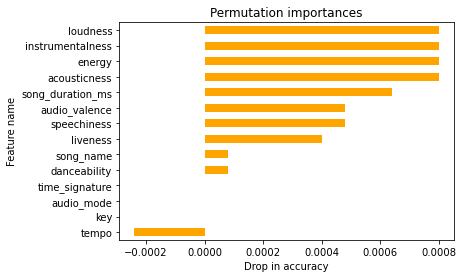

In [56]:
#Plot the permutation importances 
df_impo['importances_mean'].plot(kind='barh', color='orange')
plt.xlabel('Drop in accuracy')
plt.ylabel('Feature name')
plt.title('Permutation importances')
plt.show

In [57]:
!pip install pdpbox
!pip install shap

In [58]:
df.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence', 'popular'],
      dtype='object')

In [59]:
#create a pdp plot to show how danceability interacts with the target
import matplotlib.pyplot as plt
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'danceability'

isolated = pdp_isolate(
    model=model_RCV, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    num_grid_points=50
)


(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>, 'pdp_ax': <AxesSubplot:xlabel='danceability'>})

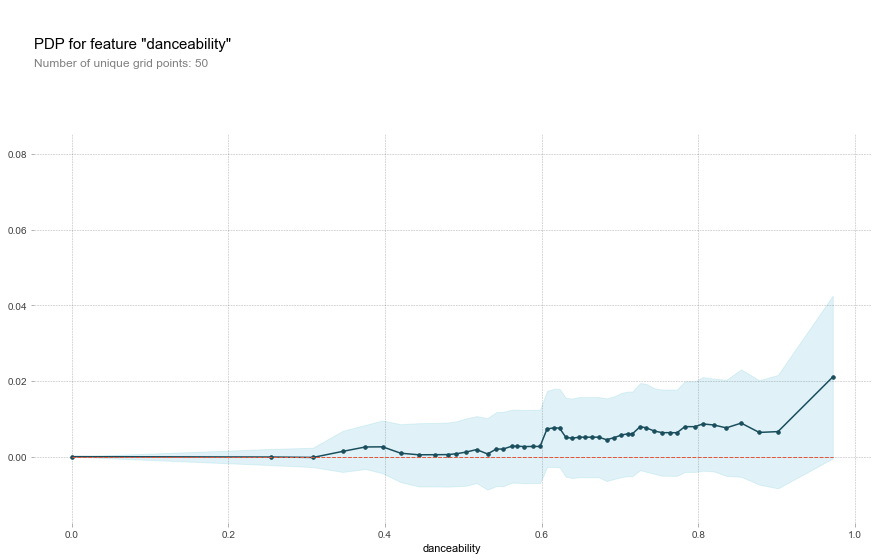

In [60]:
pdp_plot(isolated, feature_name=feature, frac_to_plot=0.01)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_ax': <AxesSubplot:xlabel='instrumentalness'>})

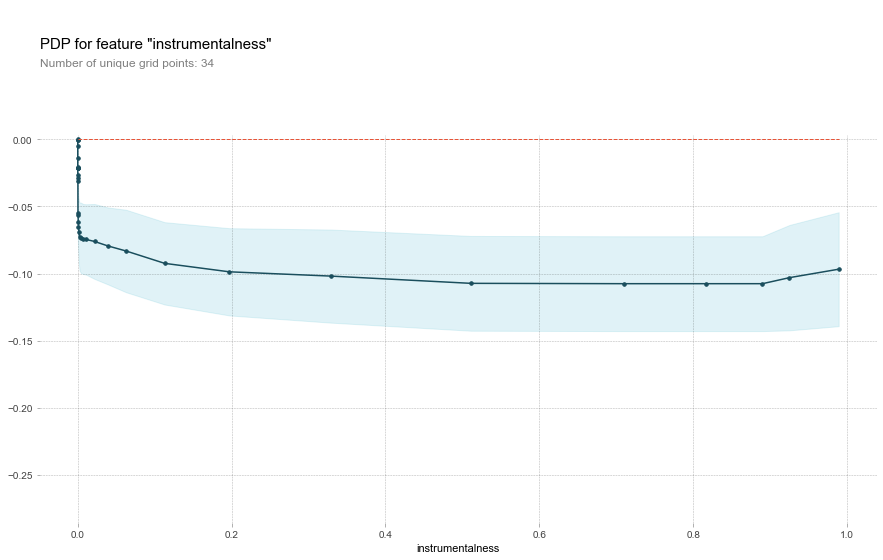

In [61]:
#create a pdp plot to see how instrumentalness interacts with the target
feature = 'instrumentalness'
isolated = pdp_isolate(
    model=model_RCV, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    num_grid_points=50
)
pdp_plot(isolated, feature_name=feature, frac_to_plot=0.01)

In [62]:
df.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence', 'popular'],
      dtype='object')

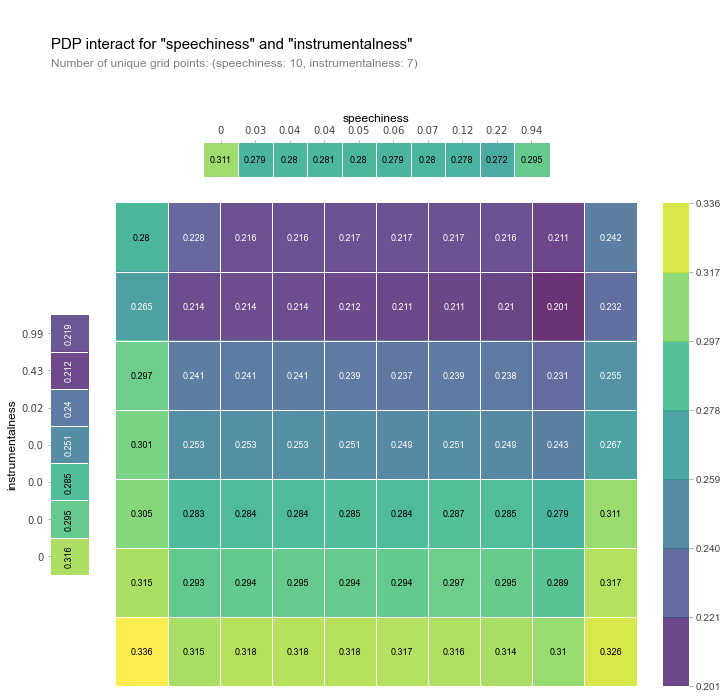

In [63]:
#show the interaction between speechiness and instrumentalness with the target
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['speechiness', 'instrumentalness']

interaction = pdp_interact(
    model=model_RCV, 
    dataset=X_val, 
    model_features=X_val.columns, 
    features=features
)

pdp_interact_plot(interaction,feature_names=features, plot_type='grid', plot_pdp=True); 

In [64]:
model_RCV

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder(cols=['song_name'],
                                                             mapping=[{'col': 'song_name',
                                                                       'data_type': dtype('O'),
                                                                       'mapping': Sham Pain                              1
To the Max                             2
Save MY Soul - Sunrise Edit            3
Nightmares By The Sea                  4
Kalaghha                               5
                                    ... 
La pachanga                         7010
We Are Your Friends - Radio Edit    7011
Best Hugs                           7012
Fool                                7013
NaN                                   -2
Length: 7014, dtype: int64}])),
                                             ('simpleimputer',
              

In [65]:
#break down the XG boost model out of a pipeline to create shap values 
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

processor = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]

model = XGBClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)

[0]	validation_0-auc:0.67851	validation_1-auc:0.59549
[1]	validation_0-auc:0.70839	validation_1-auc:0.60585
[2]	validation_0-auc:0.73037	validation_1-auc:0.60429
[3]	validation_0-auc:0.74772	validation_1-auc:0.60810
[4]	validation_0-auc:0.75963	validation_1-auc:0.61259
[5]	validation_0-auc:0.77389	validation_1-auc:0.61479
[6]	validation_0-auc:0.78547	validation_1-auc:0.61226
[7]	validation_0-auc:0.79550	validation_1-auc:0.61175
[8]	validation_0-auc:0.80261	validation_1-auc:0.61316
[9]	validation_0-auc:0.81613	validation_1-auc:0.61601
[10]	validation_0-auc:0.81982	validation_1-auc:0.62122
[11]	validation_0-auc:0.82788	validation_1-auc:0.61934
[12]	validation_0-auc:0.83148	validation_1-auc:0.62016
[13]	validation_0-auc:0.84186	validation_1-auc:0.61871
[14]	validation_0-auc:0.85303	validation_1-auc:0.61792
[15]	validation_0-auc:0.86195	validation_1-auc:0.61750
[16]	validation_0-auc:0.87238	validation_1-auc:0.61924
[17]	validation_0-auc:0.87359	validation_1-auc:0.61841
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
#look at the ROC AUC
from sklearn.metrics import roc_auc_score
X_test_processed = processor.transform(X_test)
class_index = 1
y_pred_proba = model.predict_proba(X_test_processed)[:, class_index]
print(f'Test ROC AUC for class {class_index}:')
print(roc_auc_score(y_test, y_pred_proba)) # Ranges from 0-1, higher is better

Test ROC AUC for class 1:
0.6144958703972345


In [77]:
#shapley plot for individual predictions
row = X_test.iloc[[88]]  

row 

,song_name,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
1560,Photograph,258986,0.607,0.614,0.379,0.000464,4,0.0986,-10.48,1,0.0476,107.989,4,0.201


In [74]:
y_test

8983     False
4272      True
13054    False
7545      True
8194     False
         ...  
9234     False
8849      True
1113     False
6096     False
18010     True
Name: popular, Length: 2500, dtype: bool

In [76]:
#look at an individual prediction 
import shap
row = X_test.iloc[[88]] 
explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' 
)